# Gaussian Random Field with exponential kernel

This implements a Gaussian random field with exponential kernel, 
which is equivalent to the one used to generate data for symmetry-NO
in the corresponding MATLAB file.

In [6]:
import torch
import math 


class GaussianRF_length(object):

    def __init__(self, dim, size, alpha=0.5, length=1.0, boundary="periodic", device=None):

        self.dim = dim
        self.device = device


        k_max = size//2

        if dim == 1:
            k = torch.cat((torch.arange(start=0, end=k_max, step=1, device=device), \
                           torch.arange(start=-k_max, end=0, step=1, device=device)), 0)

            #self.sqrt_eig = size*math.sqrt(2.0)*sigma*((4*(math.pi**2)*(k**2) + tau**2)**(-alpha/2.0))
            #self.sqrt_eig[0] = 0.0
            self.sqrt_eig = size * torch.exp(-( length*torch.sqrt(k**2) )**alpha)

        elif dim == 2:
            wavenumers = torch.cat((torch.arange(start=0, end=k_max, step=1, device=device), \
                                    torch.arange(start=-k_max, end=0, step=1, device=device)), 0).repeat(size,1)

            k_x = wavenumers.transpose(0,1)
            k_y = wavenumers

            # self.sqrt_eig = (size**2)*math.sqrt(2.0)*sigma*((4*(math.pi**2)*(k_x**2 + k_y**2) + tau**2)**(-alpha/2.0))
            # self.sqrt_eig[0,0] = 0.0
            self.sqrt_eig = size**2 * torch.exp(-( length*torch.sqrt(k_x**2+k_y**2) )**alpha)

        elif dim == 3:
            wavenumers = torch.cat((torch.arange(start=0, end=k_max, step=1, device=device), \
                                    torch.arange(start=-k_max, end=0, step=1, device=device)), 0).repeat(size,size,1)

            k_x = wavenumers.transpose(1,2)
            k_y = wavenumers
            k_z = wavenumers.transpose(0,2)

            # self.sqrt_eig = (size**3)*math.sqrt(2.0)*sigma*((4*(math.pi**2)*(k_x**2 + k_y**2 + k_z**2) + tau**2)**(-alpha/2.0))
            # self.sqrt_eig[0,0,0] = 0.0
            self.sqrt_eig = size**3 * torch.exp(-( length*torch.sqrt(k_x**2+k_y**2+k_z**2) )**alpha)

        self.size = []
        for j in range(self.dim):
            self.size.append(size)

        self.size = tuple(self.size)

    def sample(self, N):

        coeff = torch.randn(N, *self.size, dtype=torch.cfloat, device=self.device)
        coeff = self.sqrt_eig * coeff

        return torch.fft.ifftn(coeff, dim=list(range(-1, -self.dim - 1, -1))).real


In [13]:
def coefficient_cutoff(x_grf):
    x_grf[x_grf>0] = 12
    x_grf[x_grf<=0] = 2
    return x_grf

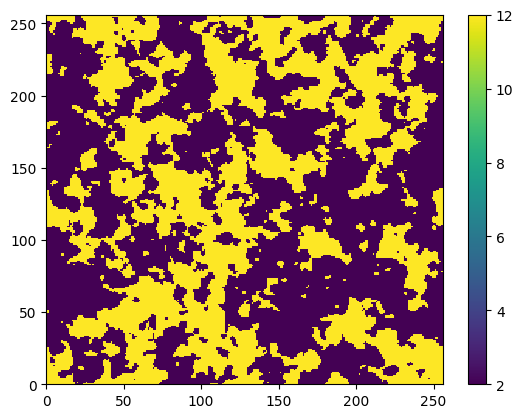

In [19]:
import matplotlib.pyplot as plt

size = 256
length = 0.5
dim = 2
Nsamp = 1
grf = GaussianRF_length(dim,size,length=length)
x = grf.sample(Nsamp)
x.shape

x = coefficient_cutoff(x)

plt.figure()
plt.pcolor(x.squeeze().numpy())
plt.colorbar()
plt.show()